In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
[1 2 4 3]


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,1.462673
std,4.215344,5.785487e+05,46644.102194,0.724088
min,1992.000000,2.000000e+04,1.000000,1.000000
25%,2011.000000,2.087498e+05,35000.000000,1.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000
75%,2016.000000,6.000000e+05,90000.000000,2.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000


In [8]:
final_dataset=df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [9]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,1
1,2007,135000,50000,Petrol,Individual,Manual,1
2,2012,600000,100000,Diesel,Individual,Manual,1
3,2017,250000,46000,Petrol,Individual,Manual,1
4,2014,450000,141000,Diesel,Individual,Manual,2


In [10]:
final_dataset['current_year']=2021

In [11]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,1,2021
1,2007,135000,50000,Petrol,Individual,Manual,1,2021
2,2012,600000,100000,Diesel,Individual,Manual,1,2021
3,2017,250000,46000,Petrol,Individual,Manual,1,2021
4,2014,450000,141000,Diesel,Individual,Manual,2,2021


In [12]:
final_dataset['no_year']=final_dataset['current_year']- final_dataset['year']

In [13]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,1,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,1,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,1,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,1,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,2,2021,7


In [14]:
final_dataset.drop(['current_year'],axis=1,inplace=True)


In [15]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,2007,60000,70000,Petrol,Individual,Manual,1,14
1,2007,135000,50000,Petrol,Individual,Manual,1,14
2,2012,600000,100000,Diesel,Individual,Manual,1,9
3,2017,250000,46000,Petrol,Individual,Manual,1,4
4,2014,450000,141000,Diesel,Individual,Manual,2,7


In [16]:
final_dataset.drop(['year'],axis=1,inplace=True)


In [17]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,1,14
1,135000,50000,Petrol,Individual,Manual,1,14
2,600000,100000,Diesel,Individual,Manual,1,9
3,250000,46000,Petrol,Individual,Manual,1,4
4,450000,141000,Diesel,Individual,Manual,2,7


In [18]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [19]:
final_dataset.head()

,selling_price,km_driven,owner,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
0,60000,70000,1,14,0,0,0,1,1,1
1,135000,50000,1,14,0,0,0,1,1,1
2,600000,100000,1,9,1,0,0,0,1,1
3,250000,46000,1,4,0,0,0,1,1,1
4,450000,141000,2,7,1,0,0,0,1,1


In [20]:
final_dataset.corr()

,selling_price,km_driven,owner,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
selling_price,1.000000,-0.192289,-0.207503,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,-0.530205
km_driven,-0.192289,1.000000,0.287763,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,0.120226
owner,-0.207503,0.287763,1.000000,0.427919,-0.005814,0.011267,0.027871,-0.003982,0.224213,0.085016
no_year,-0.413922,0.419688,0.427919,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,0.143800
fuel_Diesel,0.282947,0.285396,-0.005814,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.048098
fuel_Electric,-0.005095,-0.001372,0.011267,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.044746
fuel_LPG,-0.042434,0.036652,0.027871,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,0.024764
fuel_Petrol,-0.269453,-0.291139,-0.003982,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.039614
seller_type_Individual,-0.236798,0.182663,0.224213,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,0.214163
transmission_Manual,-0.530205,0.120226,0.085016,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,1.000000


In [21]:
import seaborn as sns

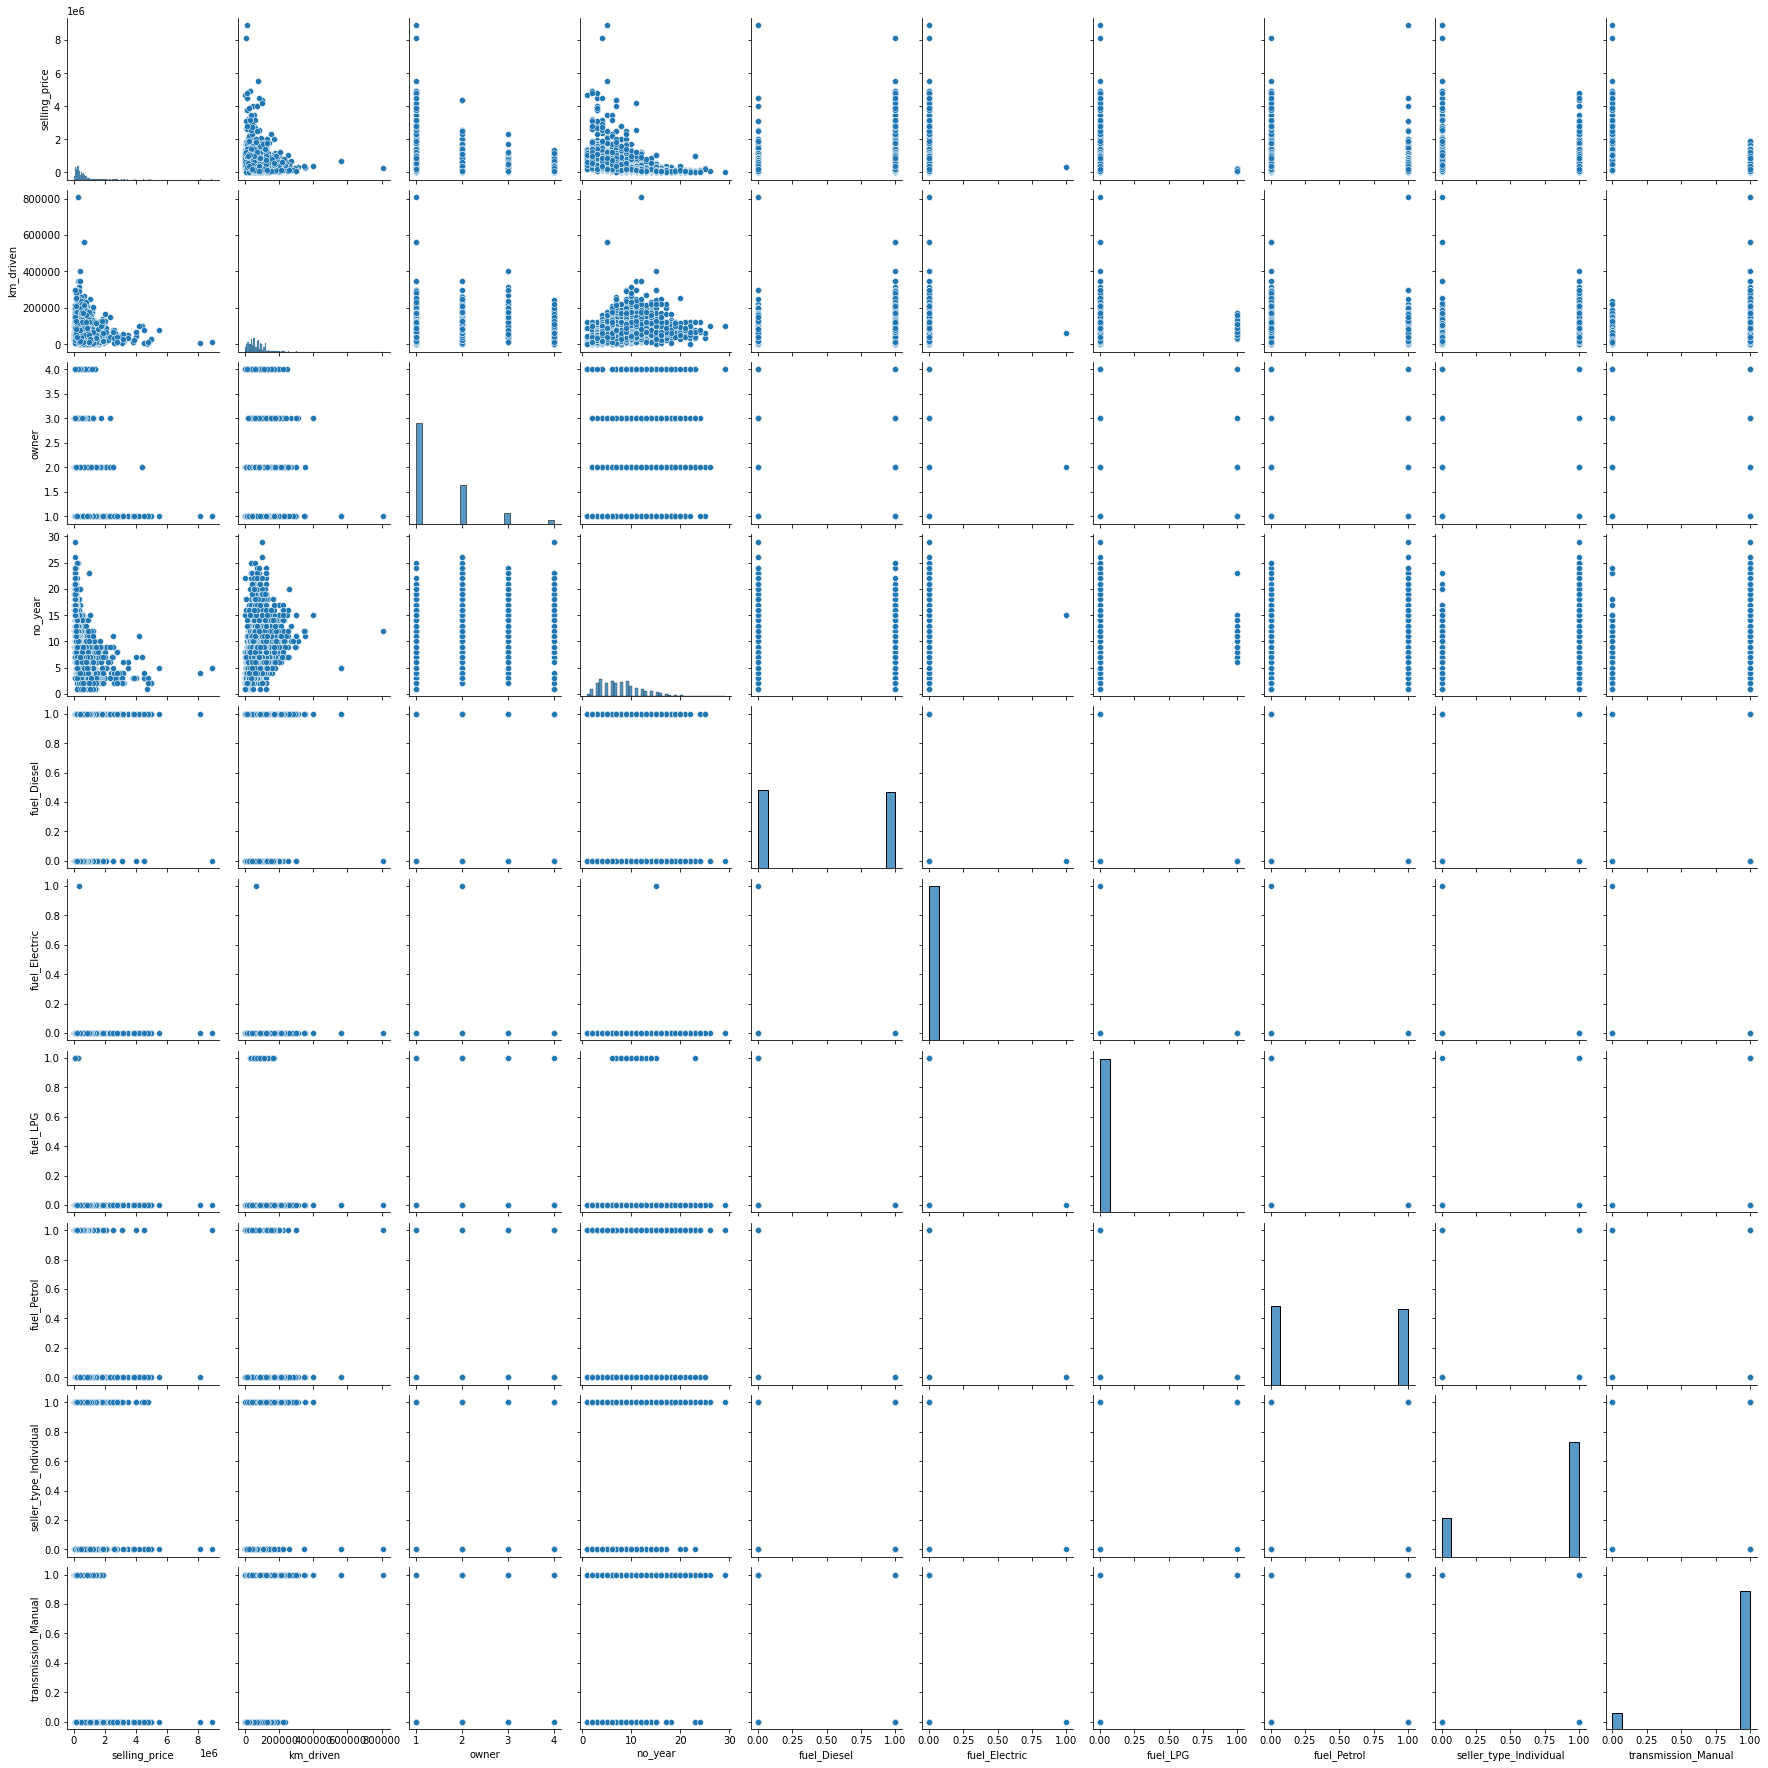

In [22]:
sns.pairplot(final_dataset)

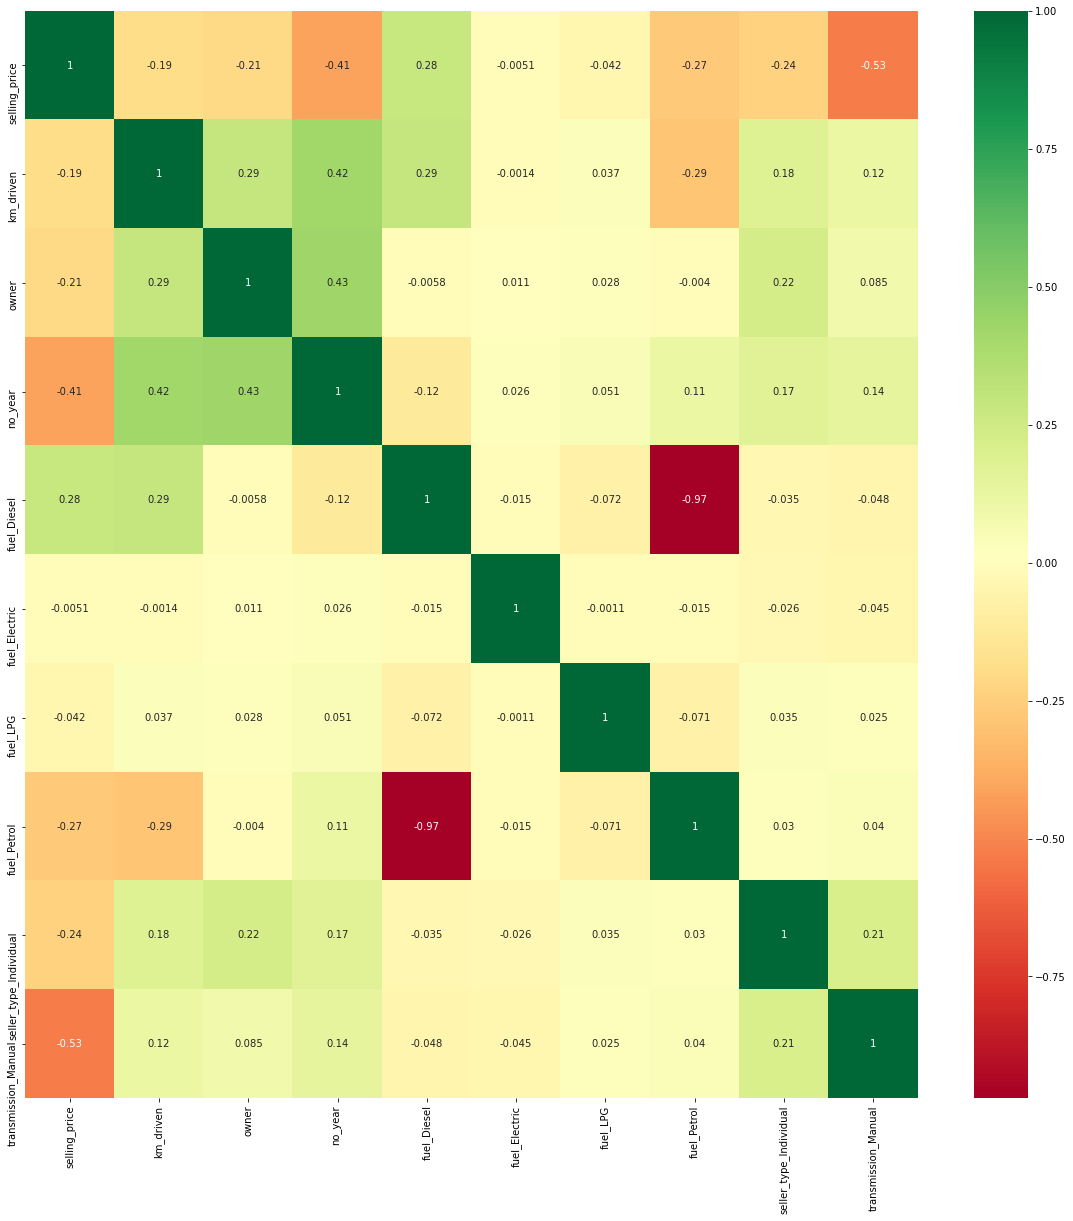

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [25]:
X.head()

,km_driven,owner,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
0,70000,1,14,0,0,0,1,1,1
1,50000,1,14,0,0,0,1,1,1
2,100000,1,9,1,0,0,0,1,1
3,46000,1,4,0,0,0,1,1,1
4,141000,2,7,1,0,0,0,1,1


In [26]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [27]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

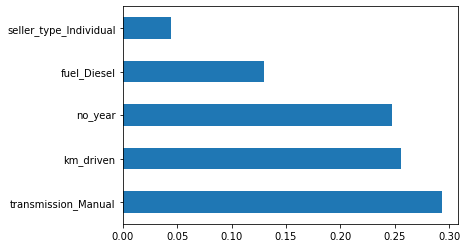

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regressor=RandomForestRegressor()

In [32]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [37]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [40]:
rf_random.best_score_

-128858943101.49483

In [41]:
predictions=rf_random.predict(X_test)

C:\Users\DEEPANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

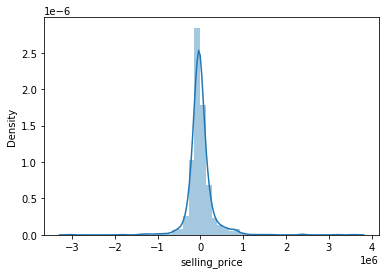

In [42]:
sns.distplot(y_test-predictions)

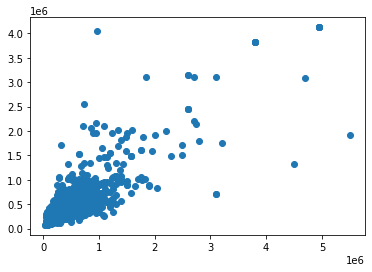

In [43]:
plt.scatter(y_test,predictions)

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 170306.58170215212
MSE: 99616589617.05064
RMSE: 315620.95877341647


In [46]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)